# EDA on Indian Premier League (Cricket)

a) Data Import

In [1]:
import pandas as pd
matches_df = pd.read_csv('/content/matches.csv')
deliveries_df = pd.read_csv('/content/deliveries.csv')
matches_df.head()
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


b) Exploratory Analysis



In [2]:
matches_df.info()
matches_df.describe()

deliveries_df.info()
deliveries_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,31012.000000,31012.000000,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000,31011.000000
mean,66.595415,1.475784,10.017929,3.623746,0.000774,0.039792,0.004547,0.024185,0.004515,0.000161,1.258102,0.073200,1.331302
std,38.529266,0.502511,5.658758,1.813969,0.027809,0.262875,0.105989,0.207864,0.073026,0.028393,1.638068,0.355717,1.624210
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,100.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,134.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,7.000000


C) Data Cleaning

In [4]:
matches_df.dropna(inplace=True)
matches_df.duplicated().sum()
deliveries_df.duplicated().sum()

0

d)  Visualization



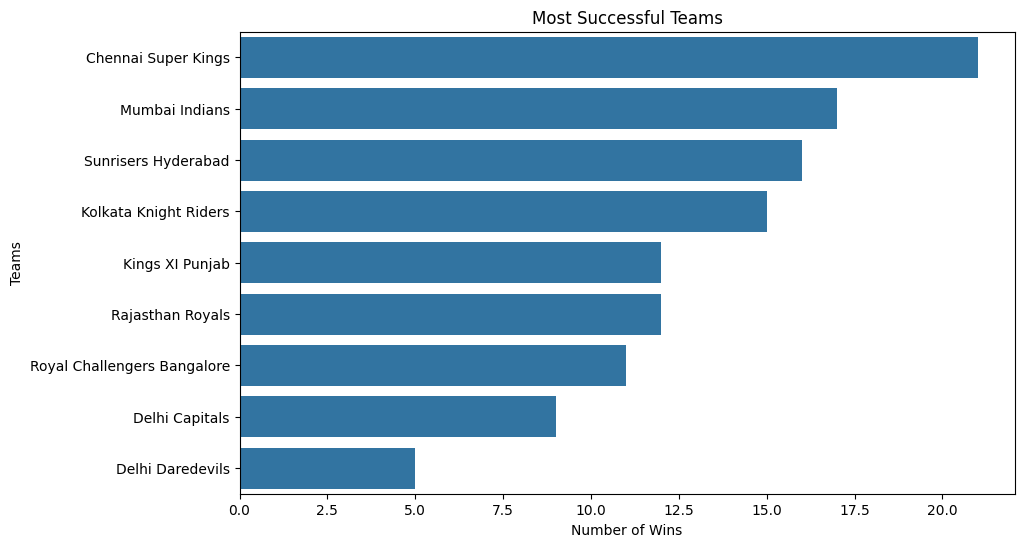

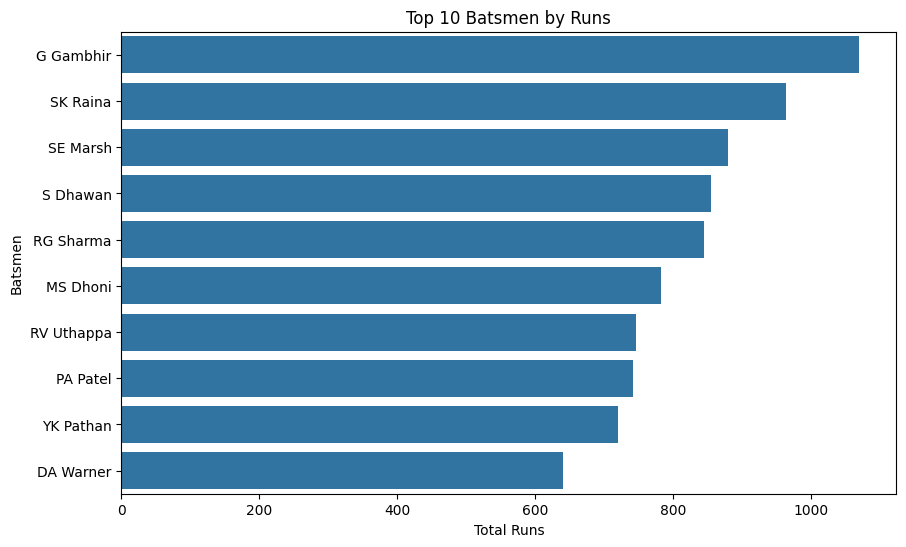

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y=matches_df['winner'], order=matches_df['winner'].value_counts().index)
plt.title('Most Successful Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.show()

top_players = deliveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_players, y=top_players.index)
plt.title('Top 10 Batsmen by Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsmen')
plt.show()



e)  Factors Contributing to Win or Loss

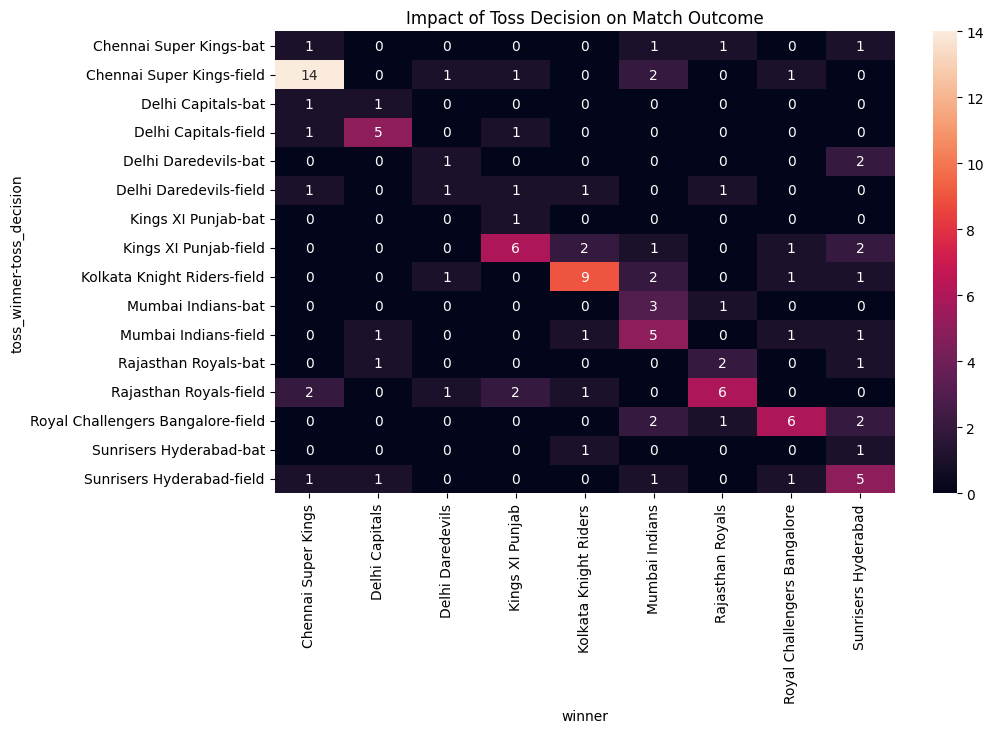

In [7]:
toss_decision = matches_df.groupby(['toss_winner', 'toss_decision', 'winner']).size().unstack().fillna(0)
plt.figure(figsize=(10,6))
sns.heatmap(toss_decision, annot=True, fmt='g')
plt.title('Impact of Toss Decision on Match Outcome')
plt.show()
